In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from termcolor import colored

from sklearn.tree import DecisionTreeClassifier
print(colored("All the libraries imported successfully","yellow"))

All the libraries imported successfully


In [ ]:
df = pd.read_csv("heart_v2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [ ]:
df.describe()

age         sex          BP  cholestrol  heart disease
count  270.000000  270.000000  270.000000  270.000000     270.000000
mean    54.433333    0.677778  131.344444  249.659259       0.444444
std      9.109067    0.468195   17.861608   51.686237       0.497827
min     29.000000    0.000000   94.000000  126.000000       0.000000
25%     48.000000    0.000000  120.000000  213.000000       0.000000
50%     55.000000    1.000000  130.000000  245.000000       0.000000
75%     61.000000    1.000000  140.000000  280.000000       1.000000
max     77.000000    1.000000  200.000000  564.000000       1.000000

In [ ]:
df["heart disease"].value_counts( )

heart disease
0    150
1    120
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train,df_test = train_test_split(df,train_size = 0.7, random_state = 42  )

In [ ]:
y_train = df_train.pop("heart disease")
X_train = df_train
y_test = df_test.pop("heart disease")
X_test = df_test
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(189, 4) (189,) (81, 4) (81,)


In [ ]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

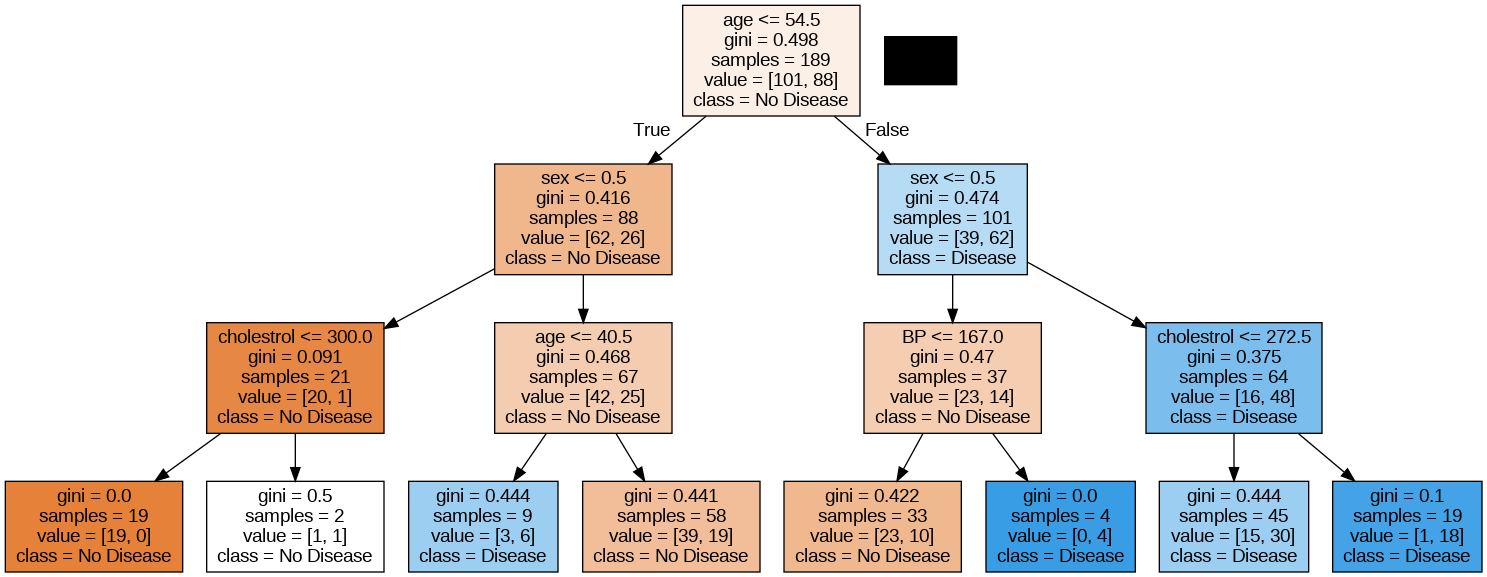

In [ ]:
dot_data = export_graphviz(dt, out_file=None, feature_names=X_train.columns,
                           class_names=["No Disease", "Disease"], filled=True)

# Convert the DOT format into a graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the tree
Image(graph.create_png())

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

In [ ]:
accuracy_score(y_train,y_train_pred)

0.7407407407407407

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[82, 19],
       [30, 58]])

In [ ]:
accuracy_score(y_test,y_test_pred)

0.6049382716049383

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[35, 14],
       [18, 14]])

In [ ]:
# setting hyperparameters : these are the parameters that we pass on to learning algorithm
# to control the training of the model, by setting the hyperparameter we tune
# the behaviour of learning algorithm. therefore it has lot of bearing on the final model
# produced by learning algorithm

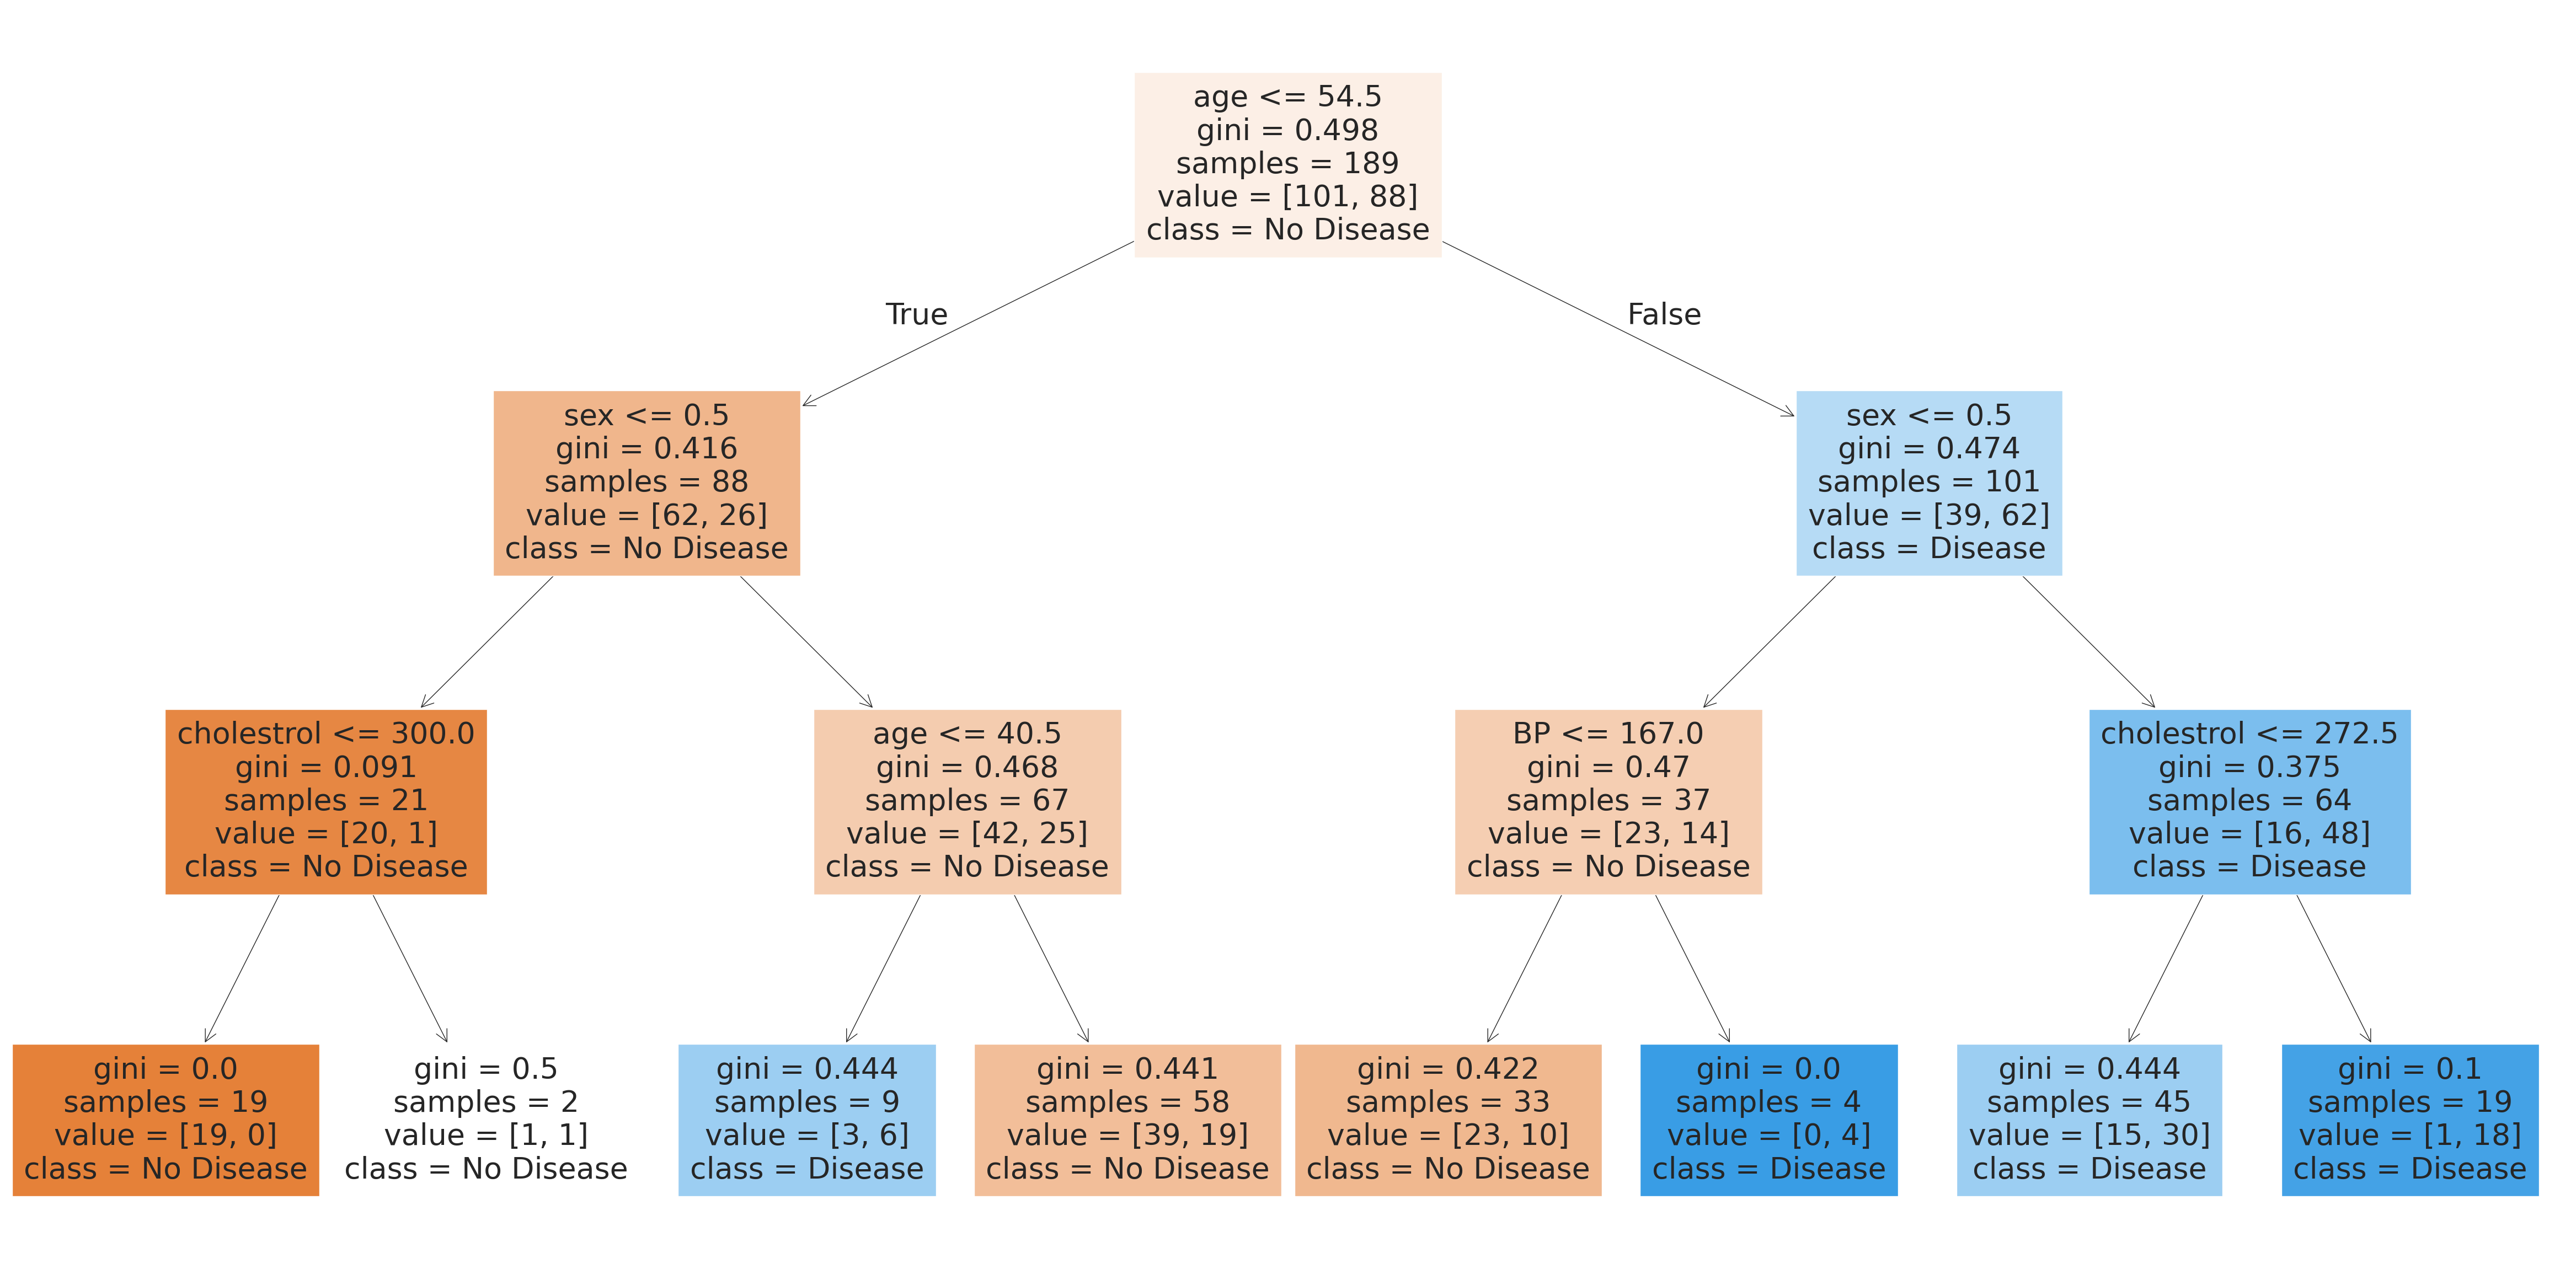

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt,filled=True,feature_names = X_train.columns, class_names=["No Disease","Disease"])
plt.show()

In [ ]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
def get_dt_graph(dt_classifier):
  dot_data = export_graphviz(dt_classifier, out_file=None, feature_names=X_train.columns,
                            class_names=["No Disease", "Disease"], filled=True)
  graph = pydotplus.graph_from_dot_data(dot_data)
  return Image(graph.create_png())

In [ ]:
def evaluate_model(dt_classifier):
  y_train_pred = dt_classifier.predict(X_train)
  y_test_pred = dt_classifier.predict(X_test)
  print("Train set Performance")
  print(accuracy_score(y_train,y_train_pred))
  print(confusion_matrix(y_train,y_train_pred))
  print("-"*50)
  print("Test set Performance")
  print(accuracy_score(y_test,y_test_pred))
  print(confusion_matrix(y_test,y_test_pred))

In [ ]:
evaluate_model(dt)

Train set Performance
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test set Performance
0.6049382716049383
[[35 14]
 [18 14]]


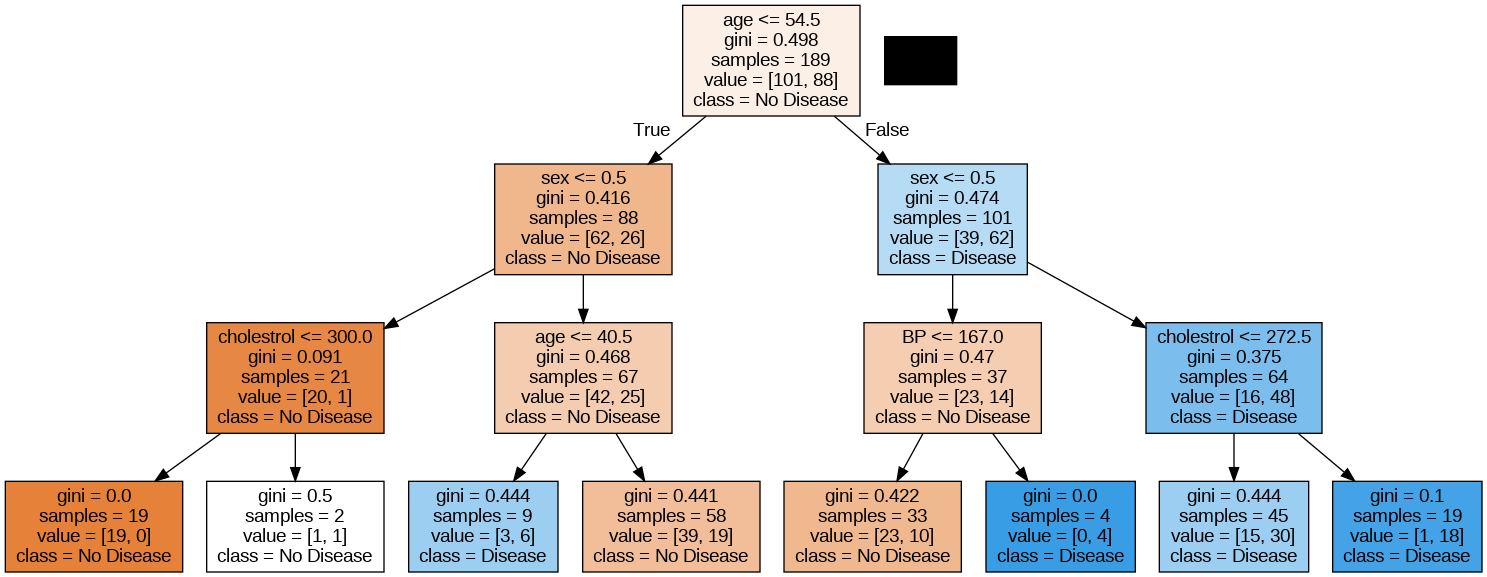

In [ ]:
get_dt_graph(dt)

In [ ]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

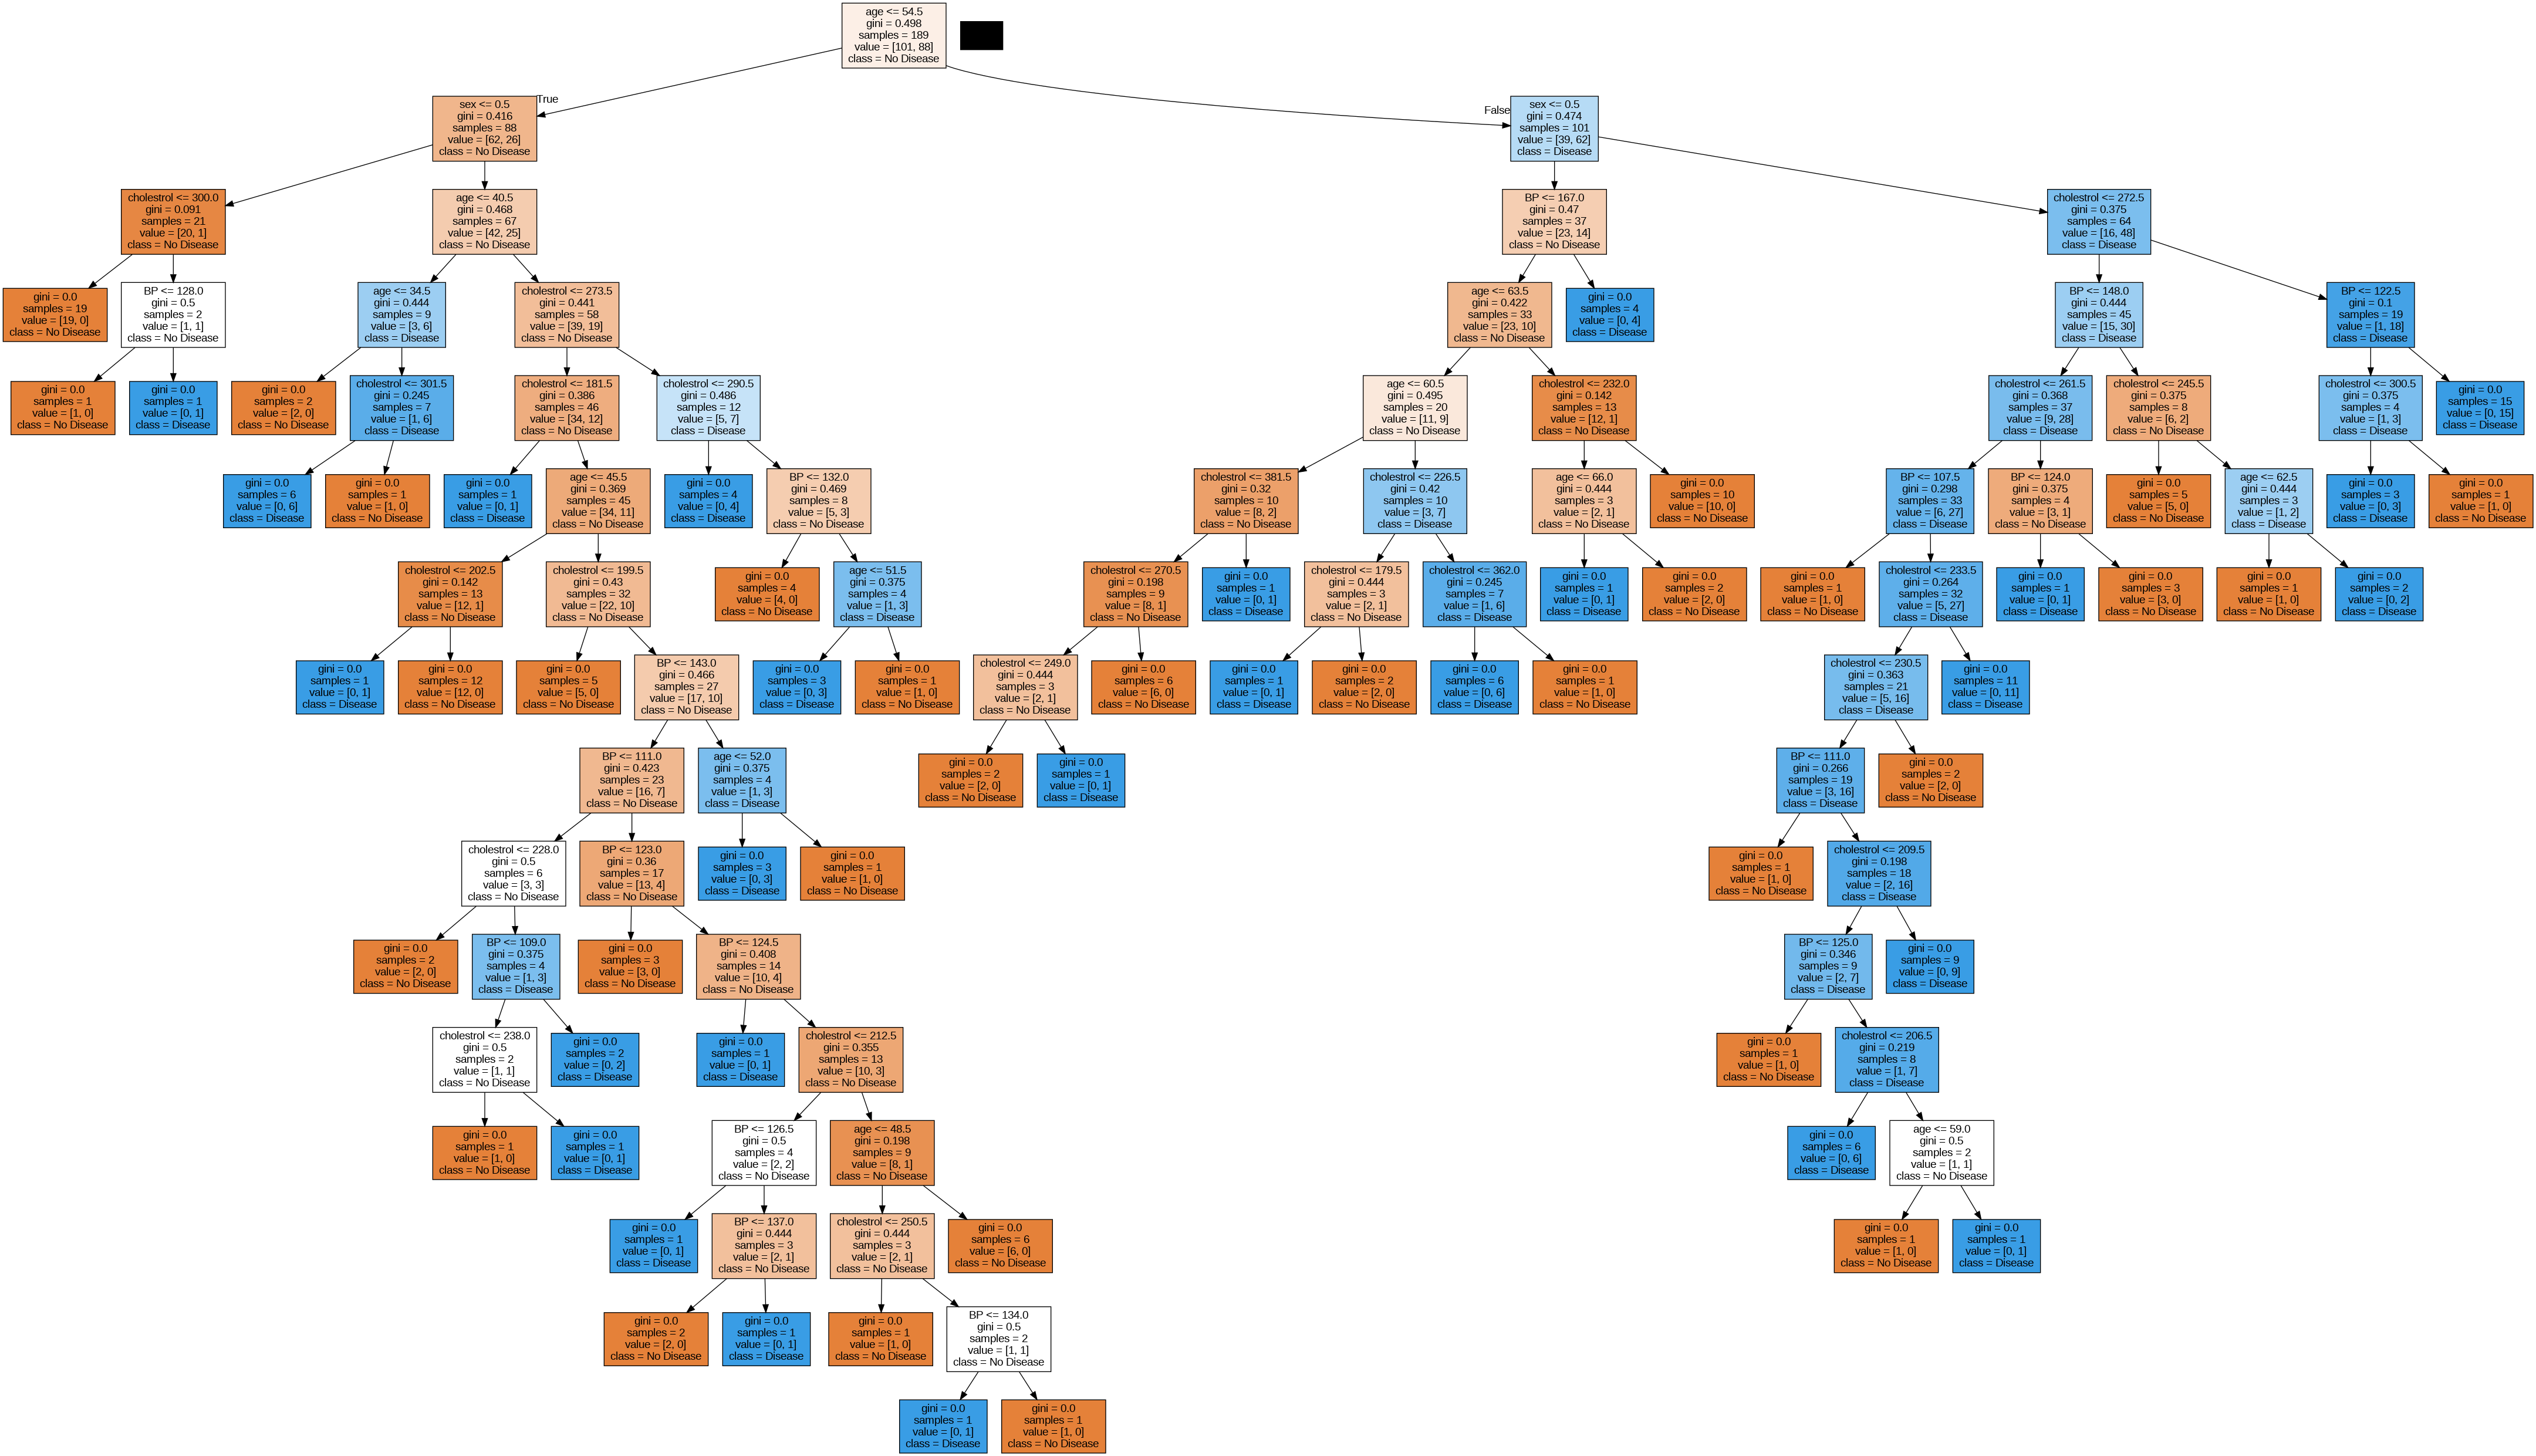

In [ ]:
get_dt_graph(dt_default)

In [ ]:
evaluate_model(dt_default)

Train set Performance
1.0
[[101   0]
 [  0  88]]
--------------------------------------------------
Test set Performance
0.6296296296296297
[[31 18]
 [12 20]]


In [ ]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20,random_state=42)
dt_min_split.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

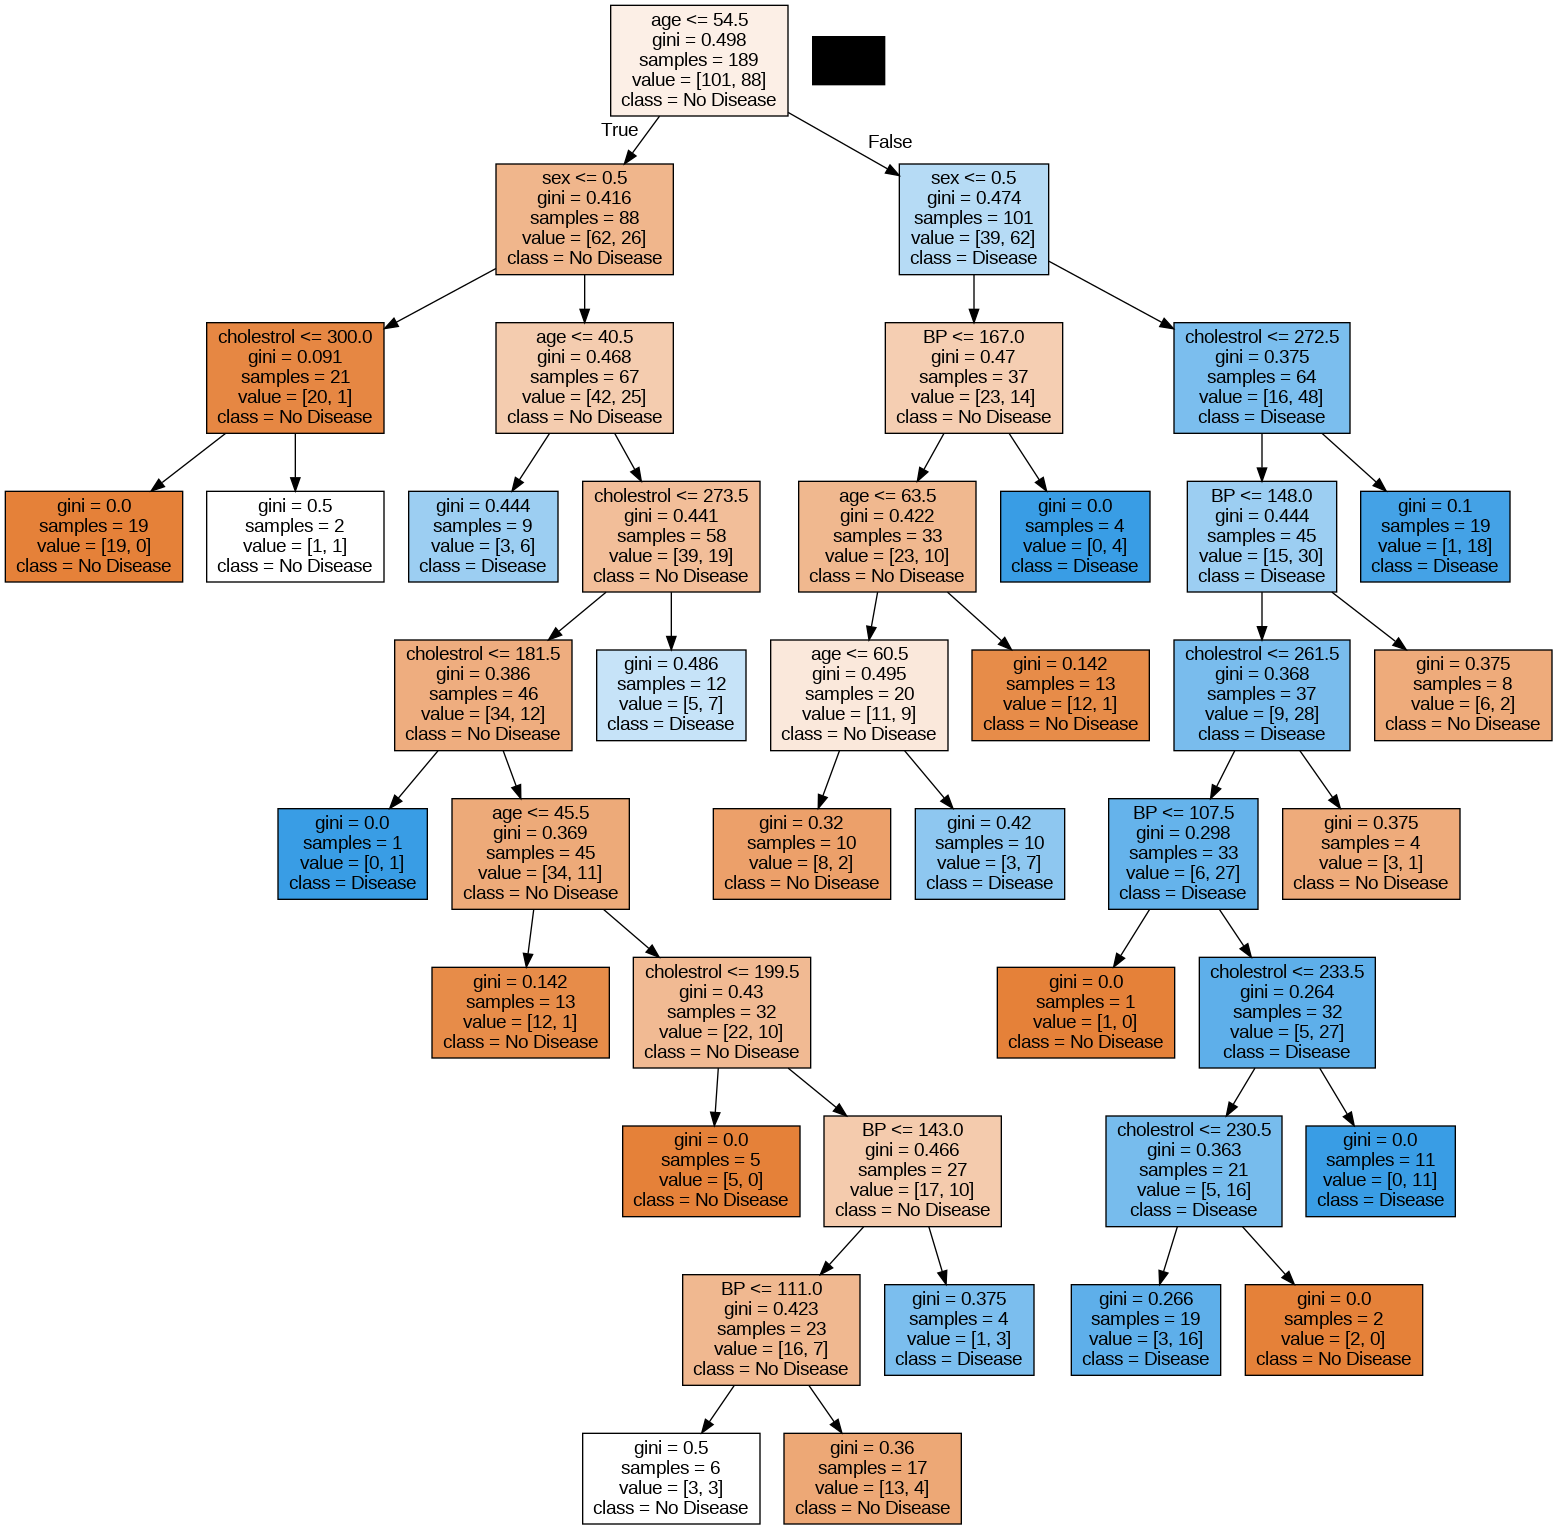

In [ ]:
get_dt_graph(dt_min_split)

In [ ]:
evaluate_model(dt_min_split)

Train set Performance
0.8359788359788359
[[85 16]
 [15 73]]
--------------------------------------------------
Test set Performance
0.6419753086419753
[[32 17]
 [12 20]]


In [ ]:
dt_min_samples = DecisionTreeClassifier(min_samples_leaf = 20,random_state=42)
dt_min_samples.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

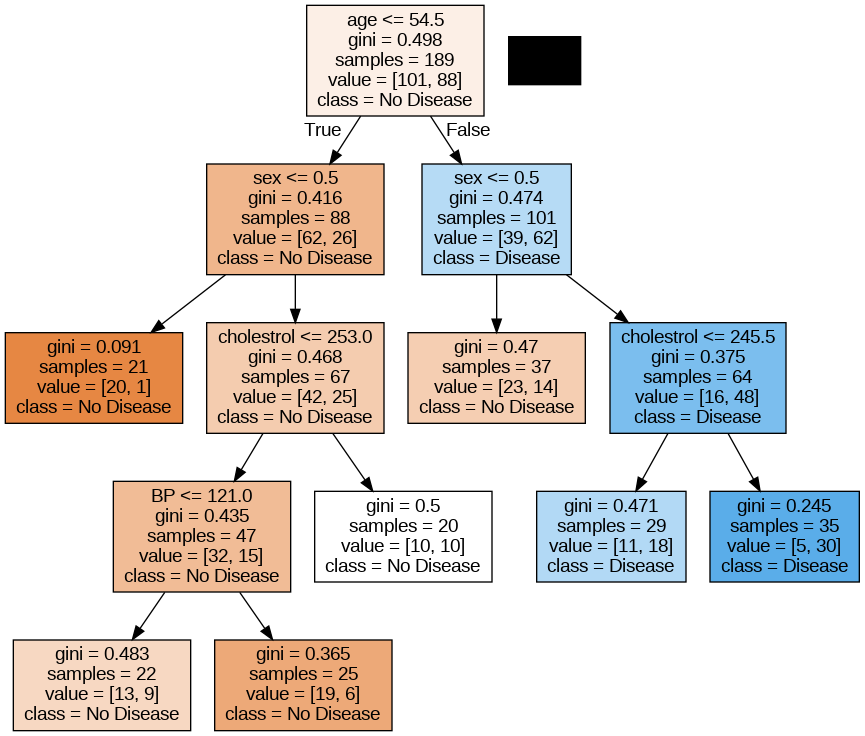

In [ ]:
get_dt_graph(dt_min_samples)

In [ ]:
dt_entropy = DecisionTreeClassifier(min_samples_leaf = 20,random_state=42, criterion="entropy")
dt_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

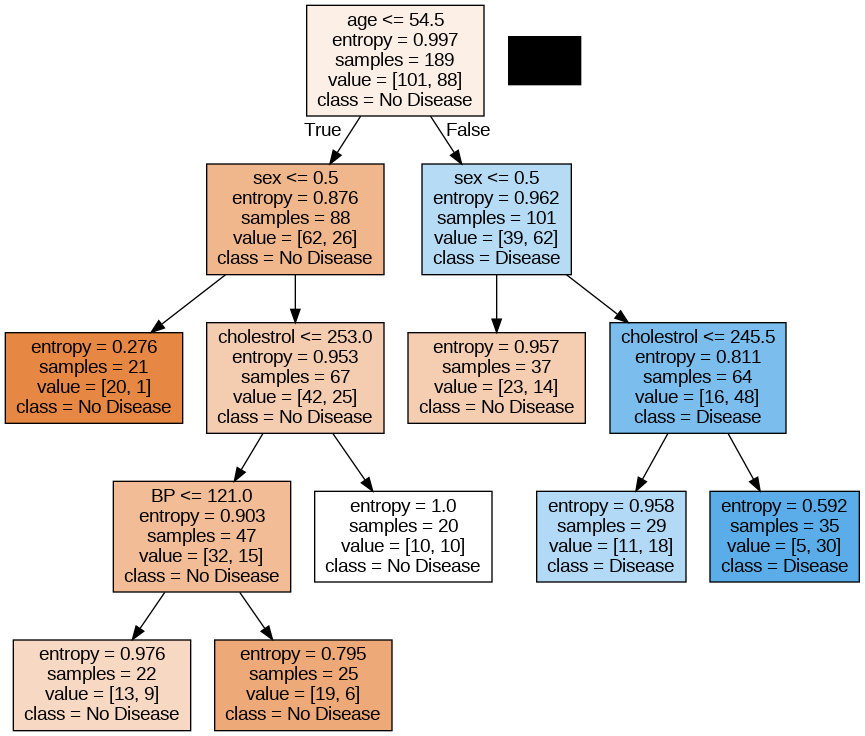

In [ ]:
get_dt_graph(dt_entropy)

In [ ]:
evaluate_model(dt_entropy)

Train set Performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test set Performance
0.6419753086419753
[[38 11]
 [18 14]]


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100],
    "criterion": ["gini","entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt,
             param_grid = params,
             cv=4,
             n_jobs=-1,verbose=1,scoring="accuracy")

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}

In [ ]:
grid_search.best_score_

np.float64(0.6669991134751774)

In [ ]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.005437      0.001128         0.003080        0.000160   
1       0.004124      0.000160         0.002944        0.000127   
2       0.004343      0.000483         0.002901        0.000028   
3       0.004313      0.000427         0.002690        0.000068   
4       0.003876      0.000397         0.002627        0.000050   

  param_criterion  param_max_depth  param_min_samples_leaf  \
0            gini                2                       5   
1            gini                2                      10   
2            gini                2                      20   
3            gini                2                      50   
4            gini                2                     100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.708333   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.708333   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.687500   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.666667   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.541667   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.744681           0.617021           0.531915         0.650488   
1           0.744681           0.617021           0.531915         0.650488   
2           0.744681           0.617021           0.531915         0.645279   
3           0.680851           0.574468           0.702128         0.656028   
4           0.531915           0.531915           0.531915         0.534353   

   std_test_score  rank_test_score  
0        0.082762               17  
1        0.082762               17  
2        0.079551               20  
3        0.048751                3  
4        0.004223               41

In [ ]:
cv_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
30       0.003720      0.000074         0.002534        0.000041   
5        0.004243      0.000449         0.002681        0.000060   
3        0.004313      0.000427         0.002690        0.000068   
8        0.003365      0.000130         0.002492        0.000095   
13       0.003439      0.000086         0.002632        0.000072   

   param_criterion  param_max_depth  param_min_samples_leaf  \
30         entropy                3                       5   
5             gini                3                       5   
3             gini                2                      50   
8             gini                3                      50   
13            gini                5                      50   

                                               params  split0_test_score  \
30  {'criterion': 'entropy', 'max_depth': 3, 'min_...           0.604167   
5   {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.625000   
3   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.666667   
8   {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.666667   
13  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.666667   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
30           0.765957           0.617021           0.680851         0.666999   
5            0.744681           0.595745           0.659574         0.656250   
3            0.680851           0.574468           0.702128         0.656028   
8            0.680851           0.574468           0.702128         0.656028   
13           0.680851           0.574468           0.702128         0.656028   

    std_test_score  rank_test_score  
30        0.064090                1  
5         0.055831                2  
3         0.048751                3  
8         0.048751                3  
13        0.048751                3

In [ ]:
dt_best = grid_search.best_estimator_

In [ ]:
evaluate_model(dt_best)

Train set Performance
0.7195767195767195
[[82 19]
 [34 54]]
--------------------------------------------------
Test set Performance
0.6172839506172839
[[36 13]
 [18 14]]


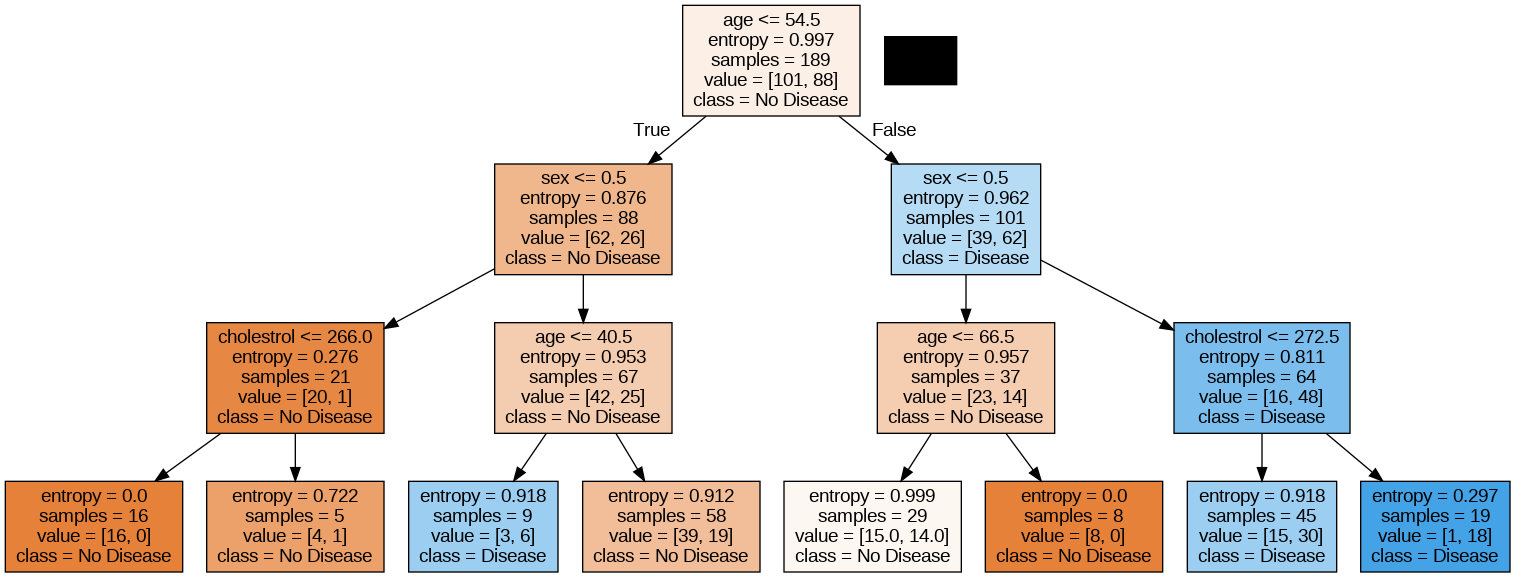

In [ ]:
get_dt_graph(dt_best)

In [ ]:
from io import IncrementalNewlineDecoder
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
from termcolor import colored

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, f1_score

print(colored("All libraries are imported successfully.","blue"))

All libraries are imported successfully.


In [ ]:
df = pd.read_csv("Housing.csv")
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
dt = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)

In [ ]:
np.random.seed(0)
df_train,df_test = train_test_split(df, train_size=0.7,random_state=100)

In [ ]:
df_train.shape, df_test.shape

((381, 13), (164, 13))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
y_train = df_train.pop("price")
X_train = df_train
y_test = df_test.pop("price")
X_test = df_test
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(381, 12) (381,) (164, 12) (164,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))


In [ ]:
y_train.max(),y_train.min()

(np.float64(0.9999999999999999), np.float64(0.0))

In [ ]:
X_train[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]] = X_train[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]].applymap(lambda x: 1 if x=="yes" else 0)


In [ ]:
X_test[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]] = X_test[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]].applymap(lambda x: 1 if x=="yes" else 0)

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, drop_first=True, dtype=int)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

In [ ]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
def get_dt_graph(dt_classifier):
  dot_data = export_graphviz(dt_classifier,out_file= None,feature_names=X_train.columns,
                            filled=True)
  graph = pydotplus.graph_from_dot_data(dot_data)
  return Image(graph.create_png())

In [ ]:
def evaluate_model(dt_classifier):
  y_train_pred = dt_classifier.predict(X_train)
  y_test_pred = dt_classifier.predict(X_test)
  print("Train set Performance")
  print(accuracy_score(y_train,y_train_pred))
  print(confusion_matrix(y_train,y_train_pred))
  print("-"*50)
  print("Test set Performance")
  print(accuracy_score(y_test,y_test_pred))
  print(confusion_matrix(y_test,y_test_pred))

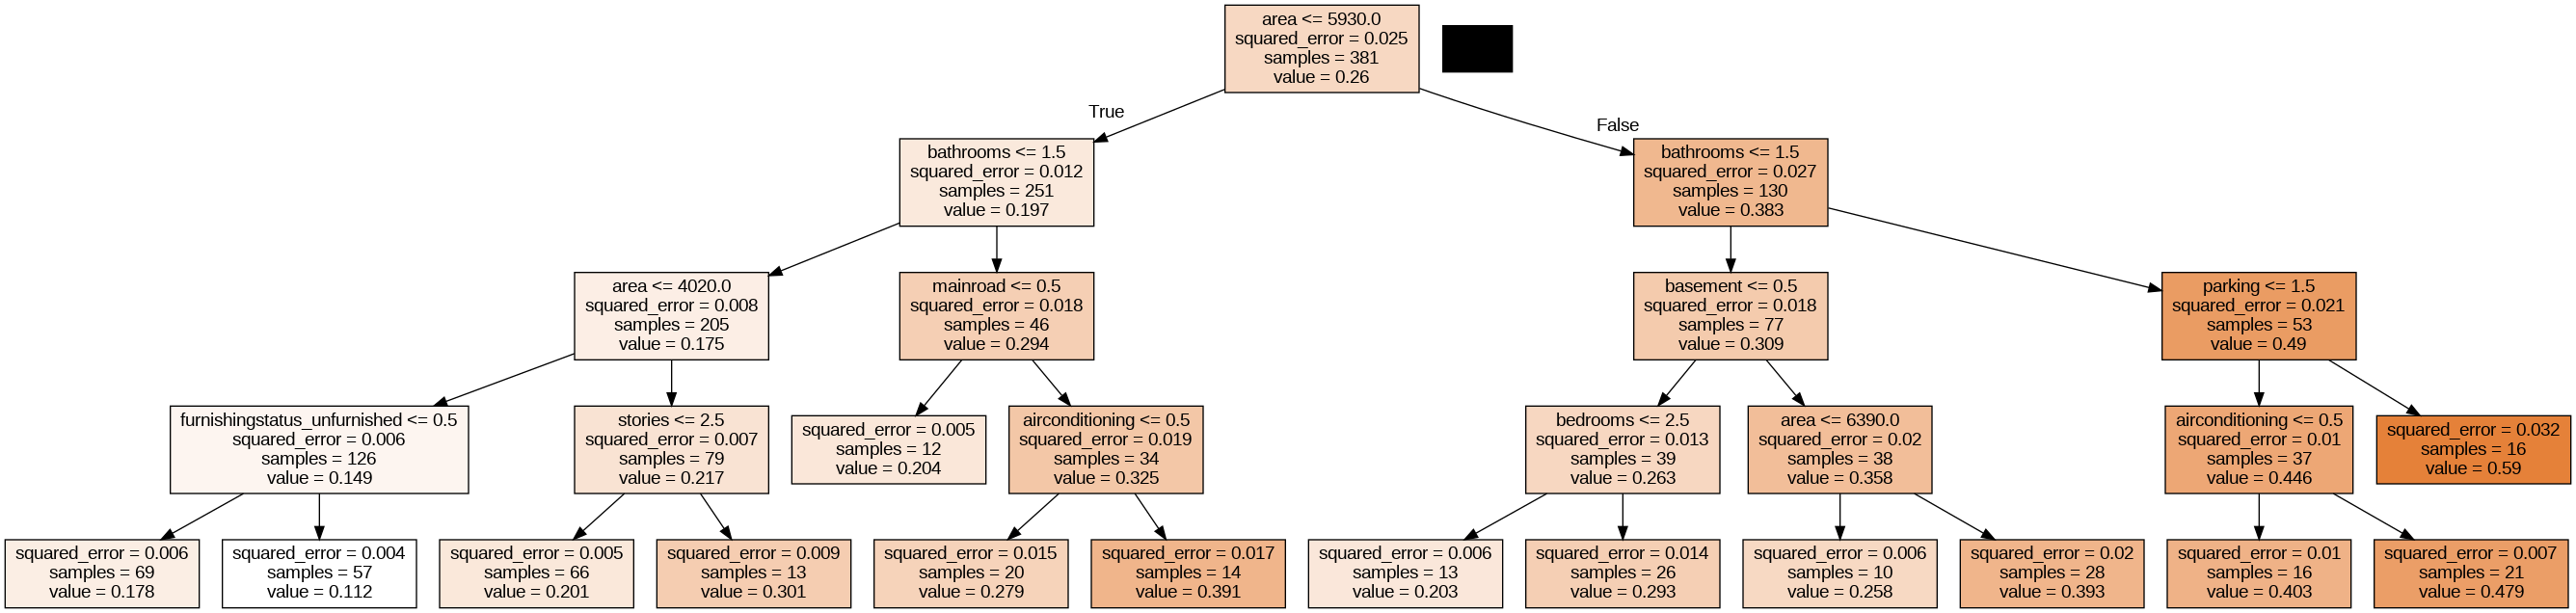

In [ ]:
get_dt_graph(dt)

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred)

(0.6234560022579934, 0.5289772624972269)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
m1 = LinearRegression()
m2 = KNeighborsRegressor()
m3 = DecisionTreeRegressor(max_depth = 4, random_state=42)

In [ ]:
m1.fit(X_train,y_train)
m2.fit(X_train,y_train)
m3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [ ]:
y_train_pred = (m1.predict(X_train).ravel() + m2.predict(X_train).ravel() +m3.predict(X_train).ravel())/3
y_test_pred = (m1.predict(X_test).ravel() + m2.predict(X_test).ravel() +m3.predict(X_test).ravel())/3

In [ ]:
y_train_pred.shape, y_train.shape

((381, 381), (381, 1))

In [ ]:
r2_score(y_train,y_train_pred)

0.7245675554642135

In [ ]:
r2_score(y_test,y_test_pred)

0.6020247889727613

In [ ]:
m1.fit(X_train,y_train)

LinearRegression()

In [ ]:
m1.predict(X_train)
r2_score(y_train,y_train_pred)

0.7245675554642135

In [ ]:
print(r2_score(y_test,m1.predict(X_test)))
print(r2_score(y_test,m2.predict(X_test)))
print(r2_score(y_test,m3.predict(X_test)))


0.672958274345992
0.3377117521914783
0.3538010415829268


In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
estimators = [
    ("lr", LinearRegression()),
    ("knn", KNeighborsRegressor()),
    ("dt", DecisionTreeRegressor(max_depth = 4, random_state=42))
]

In [ ]:
stackreg = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

In [ ]:
stackreg.fit(X_train,y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('knn', KNeighborsRegressor()),
                              ('dt',
                               DecisionTreeRegressor(max_depth=4,
                                                     random_state=42))],
                  final_estimator=LinearRegression())

In [ ]:
y_train_pred = stackreg.predict(X_train)
y_test_pred = stackreg.predict(X_test)

In [ ]:
r2_score(y_test,y_test_pred)

0.6806811629727607

In [ ]:
r2_score(y_train,y_train_pred)

0.7043066415237069

In [ ]:
level2_model = stackreg.final_estimator_

In [ ]:
level2_model.coef_

array([0.88777069, 0.05946095, 0.07640643])

In [ ]:
m2 = KNeighborsRegressor()
m3 = DecisionTreeRegressor(max_depth = 4, random_state=42)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from termcolor import colored

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv("Delhi+Delights+Data.csv")
df.head()

Average Delivery Rating (a1)  Average Orders per month (a2)  \
0                           1.5                             11   
1                           2.5                             11   
2                           2.5                             11   
3                           3.5                             11   
4                           3.5                             11   

  "Delighted Members" Purchase  
0                          Yes  
1                           No  
2                           No  
3                           No  
4                           No

In [4]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10,min_samples_leaf=5, random_state=42)

In [5]:
y_train = df.pop('"Delighted Members" Purchase')
X_train = df
print(X_train.shape, y_train.shape)

(30, 2) (30,)


In [6]:
df.columns

Index(['Average Delivery Rating (a1)', 'Average Orders per month (a2)'], dtype='object')

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

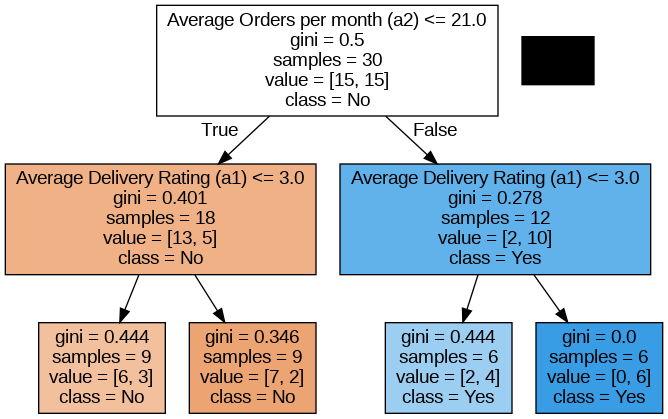

In [ ]:
dot_data = export_graphviz(dt,out_file=None,feature_names=X_train.columns,filled=True, class_names=["No","Yes"])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from termcolor import colored

In [2]:
df = pd.read_csv('Iris.csv')
df.head(5)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
y = df.pop("Species")

In [4]:
#scaling the data so that each variable get equal weihtage

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
X = df.copy()

In [8]:
x = scaler.fit_transform(X)

In [9]:
x[:5,:5]

array([[-1.72054204, -0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.69744751, -1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.67435299, -1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.65125846, -1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.62816394, -1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(random_state=42)

In [12]:
pca.fit(x)

PCA(random_state=42)

In [13]:
pca.components_

array([[ 0.48136016,  0.44844975, -0.23195044,  0.51079205,  0.5024696 ],
       [-0.02275157,  0.38285827,  0.92007839,  0.03074857,  0.07356757],
       [ 0.67406853, -0.64520569,  0.27427786, -0.13238322,  0.19127876],
       [-0.55978662, -0.40999945,  0.09491665,  0.28817343,  0.65305918],
       [ 0.0067323 , -0.26061932,  0.12416613,  0.79848404, -0.52824072]])

In [14]:
# represents how much information one principal component expalin
pca.explained_variance_ratio_

array([0.7470533 , 0.18435257, 0.04682624, 0.01764767, 0.00412021])

In [16]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

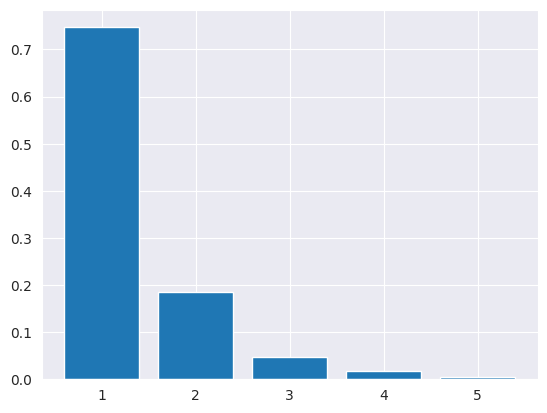

In [17]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [18]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

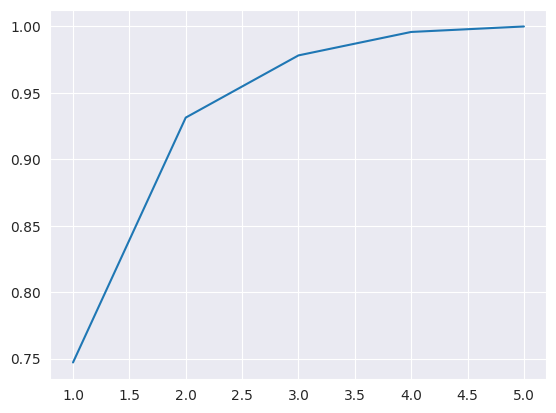

In [25]:
# Making scree plot - It show 95 percentage of variance is explained by 2 principal components
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.show()

In [26]:
pc2 = PCA(n_components=2, random_state=42)

In [28]:
new_data = pc2.fit_transform(x)
new_data.shape

(150, 2)

In [29]:
df = pd.DataFrame(new_data, columns=["PC1","PC2"])
df.head()

PC1       PC2
0 -2.816339  0.506051
1 -2.645527 -0.651799
2 -2.879481 -0.321036
3 -2.810934 -0.577363
4 -2.879884  0.670468

In [30]:
df_final = pd.concat([df,y],axis=1)
df_final.head()

PC1       PC2      Species
0 -2.816339  0.506051  Iris-setosa
1 -2.645527 -0.651799  Iris-setosa
2 -2.879481 -0.321036  Iris-setosa
3 -2.810934 -0.577363  Iris-setosa
4 -2.879884  0.670468  Iris-setosa

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


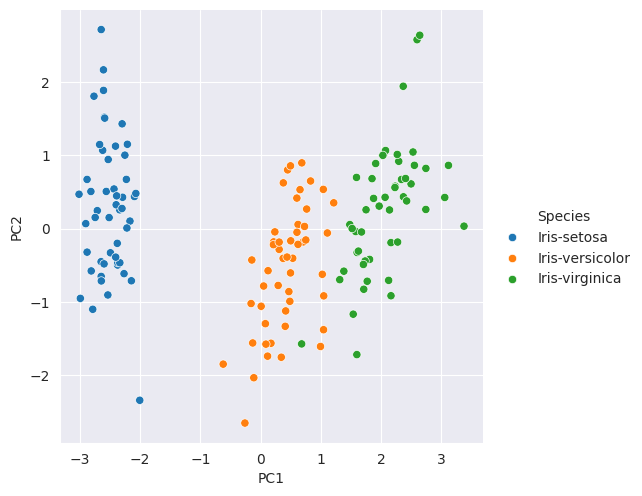

In [33]:
import seaborn as sns
sns.pairplot(df_final, x_vars=["PC1"], y_vars=["PC2"], hue="Species", size=5)
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from termcolor import colored

import warnings
warnings.filterwarnings("ignore")

In [5]:
churn_data = pd.read_csv("churn_data.csv")
customer_data = pd.read_csv("customer_data.csv")
internet_data = pd.read_csv("internet_data.csv")

In [6]:
len(churn_data), len(customer_data), len(internet_data)

(7043, 7043, 7043)

In [7]:
internet_data.head(2)

customerID     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  7590-VHVEG  No phone service             DSL             No          Yes   
1  5575-GNVDE                No             DSL            Yes           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies  
0               No          No          No              No  
1              Yes          No          No              No

In [8]:
df_1 = pd.merge(churn_data,customer_data, how="inner",on="customerID")
df_1.head(2)

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   

      PaymentMethod  MonthlyCharges TotalCharges Churn  gender  SeniorCitizen  \
0  Electronic check           29.85        29.85    No  Female              0   
1      Mailed check           56.95       1889.5    No    Male              0   

  Partner Dependents  
0     Yes         No  
1      No         No

In [9]:
telecom = pd.merge(df_1,internet_data, how="inner",on="customerID")
telecom.head(2)

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   

      PaymentMethod  MonthlyCharges TotalCharges Churn  gender  ...  Partner  \
0  Electronic check           29.85        29.85    No  Female  ...      Yes   
1      Mailed check           56.95       1889.5    No    Male  ...       No   

  Dependents     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0         No  No phone service             DSL             No          Yes   
1         No                No             DSL            Yes           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies  
0               No          No          No              No  
1              Yes          No          No              No  

[2 rows x 21 columns]

In [10]:
telecom.shape

(7043, 21)

In [11]:
telecom.describe()

tenure  MonthlyCharges  SeniorCitizen
count  7043.000000     7043.000000    7043.000000
mean     32.371149       64.761692       0.162147
std      24.559481       30.090047       0.368612
min       0.000000       18.250000       0.000000
25%       9.000000       35.500000       0.000000
50%      29.000000       70.350000       0.000000
75%      55.000000       89.850000       0.000000
max      72.000000      118.750000       1.000000

In [12]:
for col in telecom.columns:
  if telecom[col].nunique() <=3:
    print(telecom[col].value_counts())
    print("="*50)

PhoneService
Yes    6361
No      682
Name: count, dtype: int64
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
Churn
No     5174
Yes    1869
Name: count, dtype: int64
gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
Dev

In [13]:
for col in telecom.columns:
  if telecom[col].nunique() == 2:
    print(telecom[col].value_counts())
    print("="*50)

PhoneService
Yes    6361
No      682
Name: count, dtype: int64
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
Churn
No     5174
Yes    1869
Name: count, dtype: int64
gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


In [14]:
telecom["PhoneService"] = telecom["PhoneService"].map({"Yes":1,"No":0})
telecom["Dependents"] = telecom["Dependents"].map({"Yes":1,"No":0})
telecom["Partner"] = telecom["Partner"].map({"Yes":1,"No":0})
telecom["PaperlessBilling"] = telecom["PaperlessBilling"].map({"Yes":1,"No":0})
telecom["Churn"] = telecom["Churn"].map({"Yes":1,"No":0})

In [15]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   int64  
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   int64  
 12  Dependents        7043 non-null   int64  
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [16]:
telecom["TotalCharges"] = pd.to_numeric(telecom["TotalCharges"], errors="coerce")

In [18]:
telecom.select_dtypes(include=["int64","float64"]).columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner', 'Dependents'],
      dtype='object')

In [19]:
telecom.select_dtypes(exclude=["int64","float64"]).columns

Index(['customerID', 'Contract', 'PaymentMethod', 'gender', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [20]:
df = telecom.copy()
df.shape

(7043, 21)

In [21]:
df.drop("customerID",axis=1, inplace=True)

In [22]:
df.shape

(7043, 20)

In [23]:
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.shape

(7043, 31)

In [24]:
num_df = df[["tenure","MonthlyCharges","TotalCharges","SeniorCitizen"]]

In [25]:
num_df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99]).T

count         mean          std    min     25%       50%  \
tenure          7043.0    32.371149    24.559481   0.00    9.00    29.000   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.50    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.45  1397.475   
SeniorCitizen   7043.0     0.162147     0.368612   0.00    0.00     0.000   

                      75%      90%      95%       99%      max  
tenure            55.0000    69.00    72.00    72.000    72.00  
MonthlyCharges    89.8500   102.60   107.40   114.729   118.75  
TotalCharges    3794.7375  5976.64  6923.59  8039.883  8684.80  
SeniorCitizen      0.0000     1.00     1.00     1.000     1.00

In [26]:
round(100*(df.isnull().sum()/len(df.index)),2)

tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No phone service           0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No internet service       0.00
OnlineSecurity_Yes                       0.00
OnlineBackup_No internet service         0.00
OnlineBackup_Yes                         0.00
DeviceProtection_No internet service     0.00
DeviceProtection_Yes                     0.00
TechSupport_No internet service          0.00
TechSupport_Yes                          0.00
StreamingTV_No internet service          0.00
StreamingTV_Yes                          0.00
StreamingMovies_No internet service      0.00
StreamingMovies_Yes                      0.00
dtype: float64

In [27]:
df = df[~np.isnan(df["TotalCharges"])]

In [28]:
round(100*(df.isnull().sum()/len(df.index)),2)

tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No phone service           0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No internet service       0.0
OnlineSecurity_Yes                       0.0
OnlineBackup_No internet service         0.0
OnlineBackup_Yes                         0.0
DeviceProtection_No internet service     0.0
DeviceProtection_Yes                     0.0
TechSupport_No internet service          0.0
TechSupport_Yes                          0.0
StreamingTV_No internet service          0.0
StreamingTV_Yes                          0.0
StreamingMovies_No internet service      0.0
StreamingMovies_Yes                      0.0
dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   PhoneService                           7032 non-null   int64  
 2   PaperlessBilling                       7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7032 non-null   int64  
 6   SeniorCitizen                          7032 non-null   int64  
 7   Partner                                7032 non-null   int64  
 8   Dependents                             7032 non-null   int64  
 9   Contract_One year                      7032 non-null   int64  
 10  Contract_Two year                      7032 non-null   int64  
 11  PaymentMe

In [30]:
df_2 = df[["tenure","MonthlyCharges","TotalCharges"]]

In [31]:
normalized_df = (df_2-df_2.mean())/df_2.std()
df = df.drop(["tenure","MonthlyCharges","TotalCharges"],axis=1)
df = pd.concat( [df,normalized_df],axis=1)
df.head()

PhoneService  PaperlessBilling  Churn  SeniorCitizen  Partner  Dependents  \
0             0                 1      0              0        1           0   
1             1                 0      0              0        0           0   
2             1                 1      1              0        0           0   
3             0                 0      0              0        0           0   
4             1                 1      1              0        0           0   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                  1                  0   
4                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  ...  \
0                                      0                               1  ...   
1                                      0                               0  ...   
2                                      0                               0  ...   
3                                      0                               0  ...   
4                                      0                               1  ...   

   DeviceProtection_Yes  TechSupport_No internet service  TechSupport_Yes  \
0                     0                                0                0   
1                     1                                0                0   
2                     0                                0                0   
3                     1                                0                1   
4                     0                                0                0   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes    tenure  \
0                                    0                    0 -1.280157   
1                                    0                    0  0.064298   
2                                    0                    0 -1.239416   
3                                    0                    0  0.512450   
4                                    0                    0 -1.239416   

   MonthlyCharges  TotalCharges  
0       -1.161611     -0.994123  
1       -0.260859     -0.173727  
2       -0.363897     -0.959581  
3       -0.747797     -0.195234  
4        0.196164     -0.940391  

[5 rows x 31 columns]

In [32]:
df["Churn"].value_counts(normalize=True)
rate_of_churn = (sum(telecom["Churn"])/len(telecom["Churn"].index))*100
rate_of_churn

26.536987079369588

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, r2_score

In [35]:
X = df.drop("Churn",axis=1)
y = df["Churn"]

In [36]:
X_train, X_test,y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=100)

In [37]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4922, 30) (4922,)
(2110, 30) (2110,)


In [38]:
import statsmodels.api as sm

In [39]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [40]:
print(X_train.shape, y_train.shape)


(4922, 30) (4922, 1)


In [41]:
# Logistic Regression Model
logm1 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Wed, 26 Mar 2025   Deviance:                       4009.4
Time:                        05:18:27   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3056      0.773     -2.984      0.003      -3.820      -0.791
PhoneService                             -0.6775      0.090     -7.495      0.000      -0.855      -0.500
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No phone service           -1.6282      0.775     -2.100      0.036      -3.148      -0.108
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -0.3970      0.140     -2.831      0.005      -0.672      -0.122
OnlineSecurity_No internet service       -0.3970      0.140     -2.831      0.005      -0.672      -0.122
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_No internet service         -0.3970      0.140     -2.831      0.005      -0.672      -0.122
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_No internet service     -0.3970      0.140     -2.831      0.005      -0.672      -0.122
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_No internet service          -0.3970      0.140     -2.831      0.005      -0.672      -0.122
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_No internet service          -0.3970      0.140     -2.831      0.005      -0.672      -0.122
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
Streaming

<Axes: >

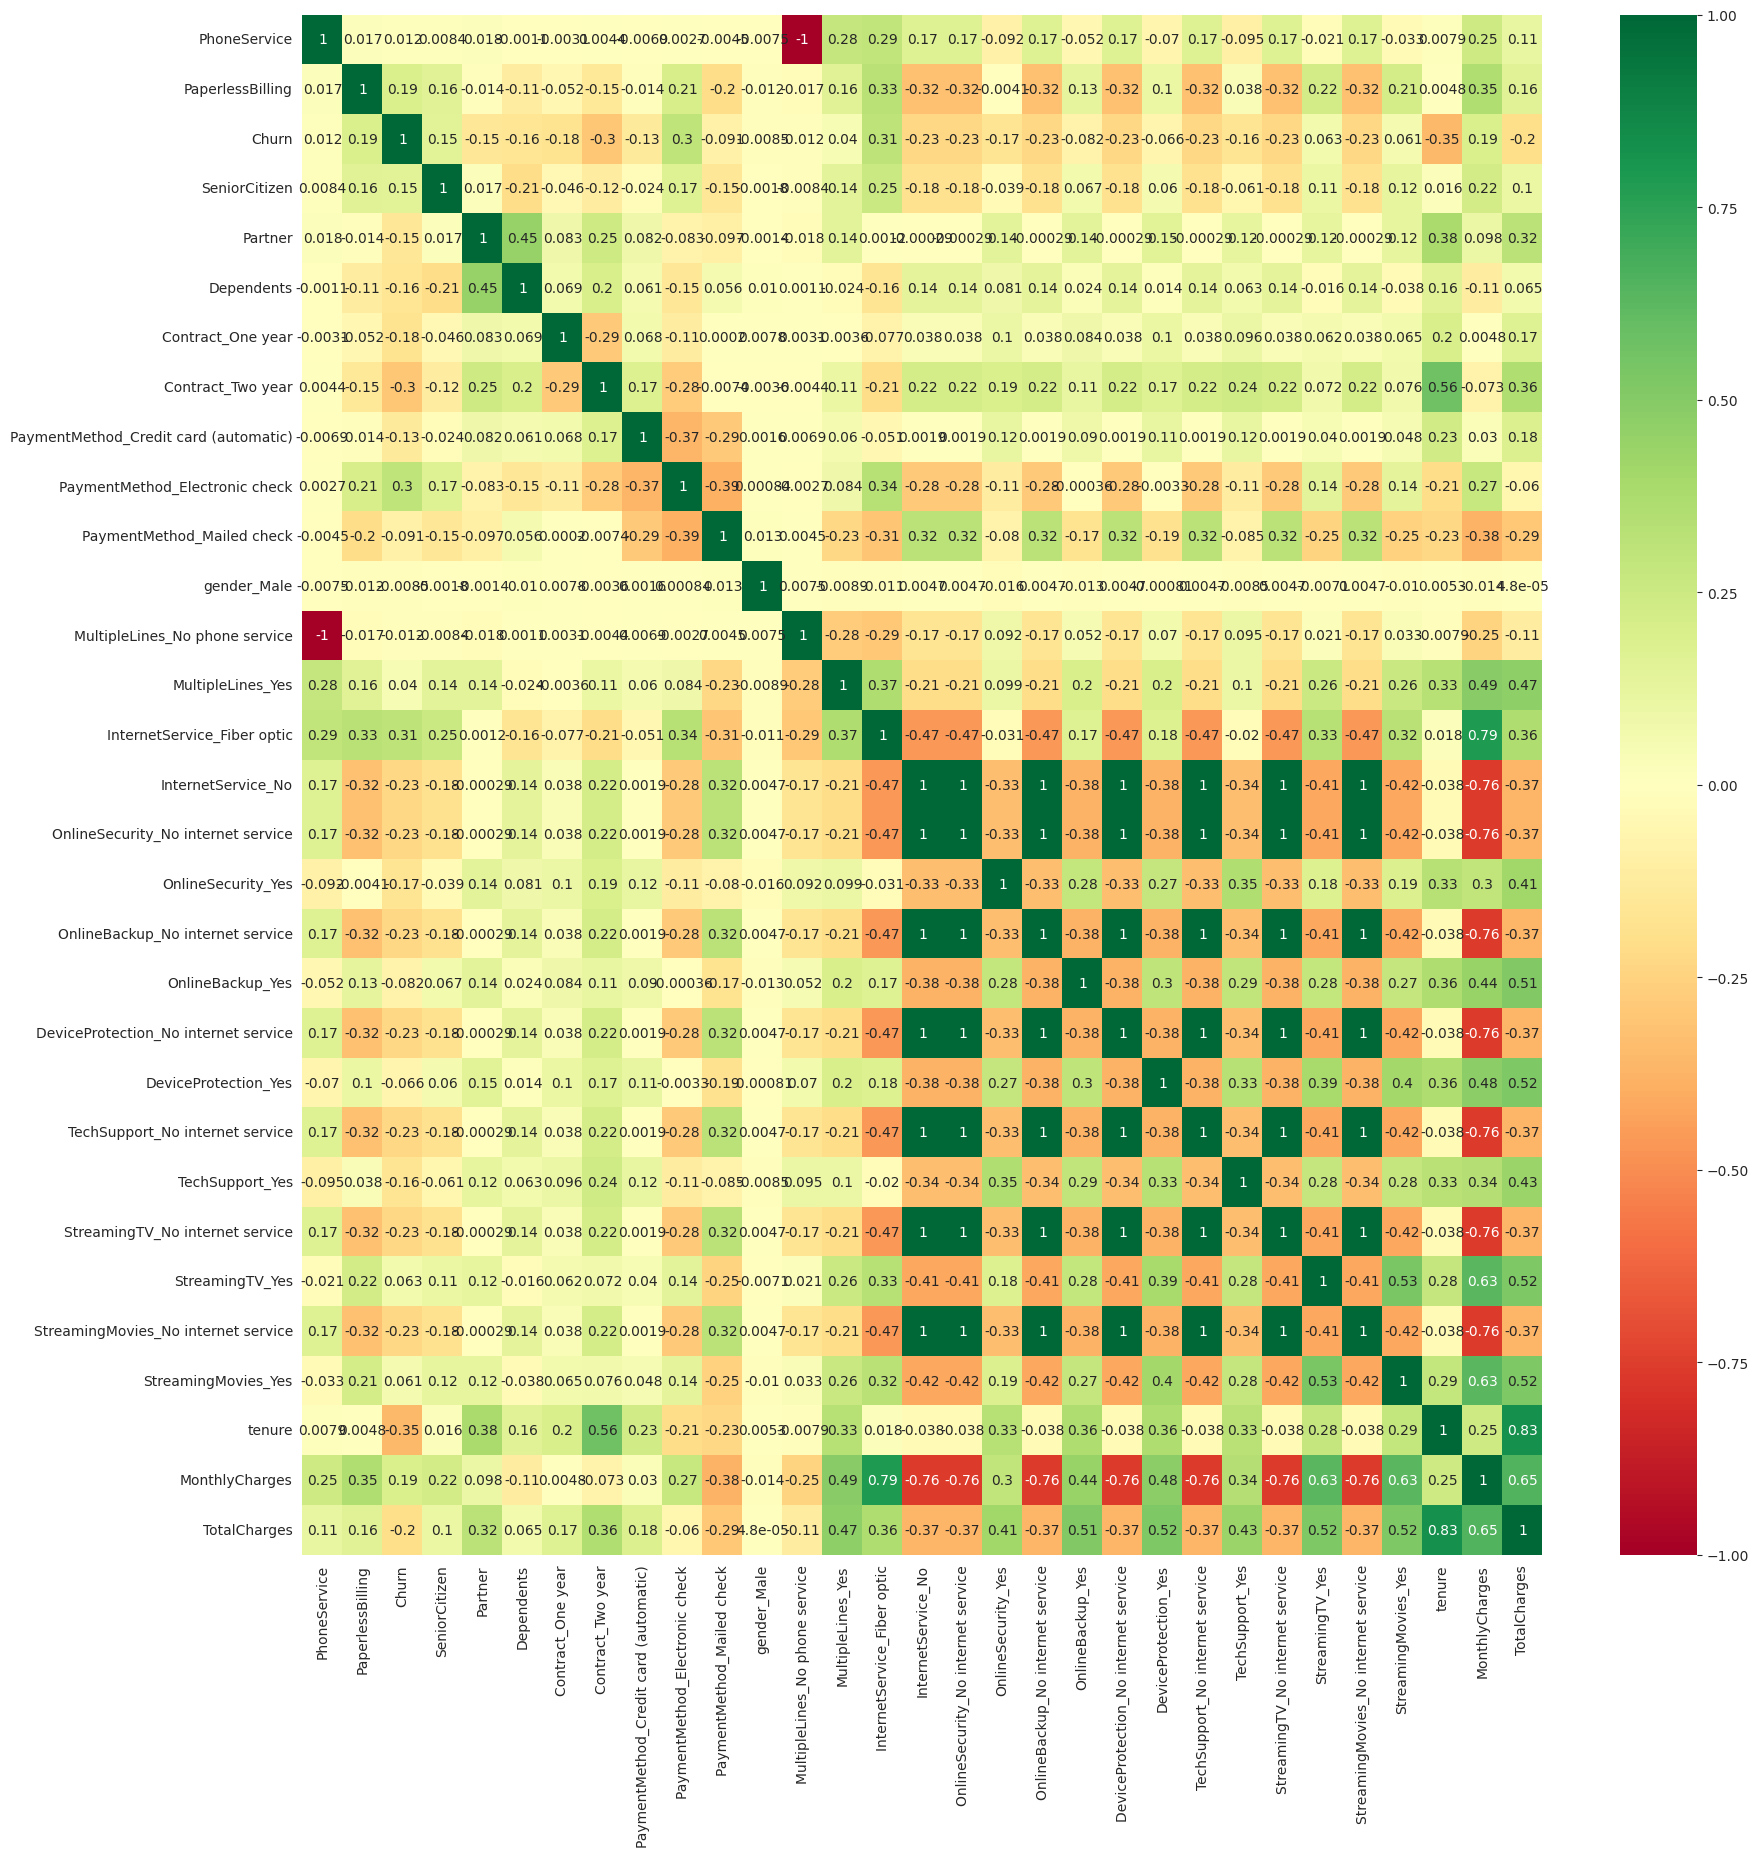

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, cmap="RdYlGn")


In [43]:
X_train2 = X_train.drop(["MultipleLines_No phone service","OnlineSecurity_No internet service","OnlineBackup_No internet service","DeviceProtection_No internet service","TechSupport_No internet service","StreamingTV_No internet service","StreamingMovies_No internet service"],axis=1)
X_test2 = X_test.drop(["MultipleLines_No phone service","OnlineSecurity_No internet service","OnlineBackup_No internet service","DeviceProtection_No internet service","TechSupport_No internet service","StreamingTV_No internet service","StreamingMovies_No internet service"],axis=1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

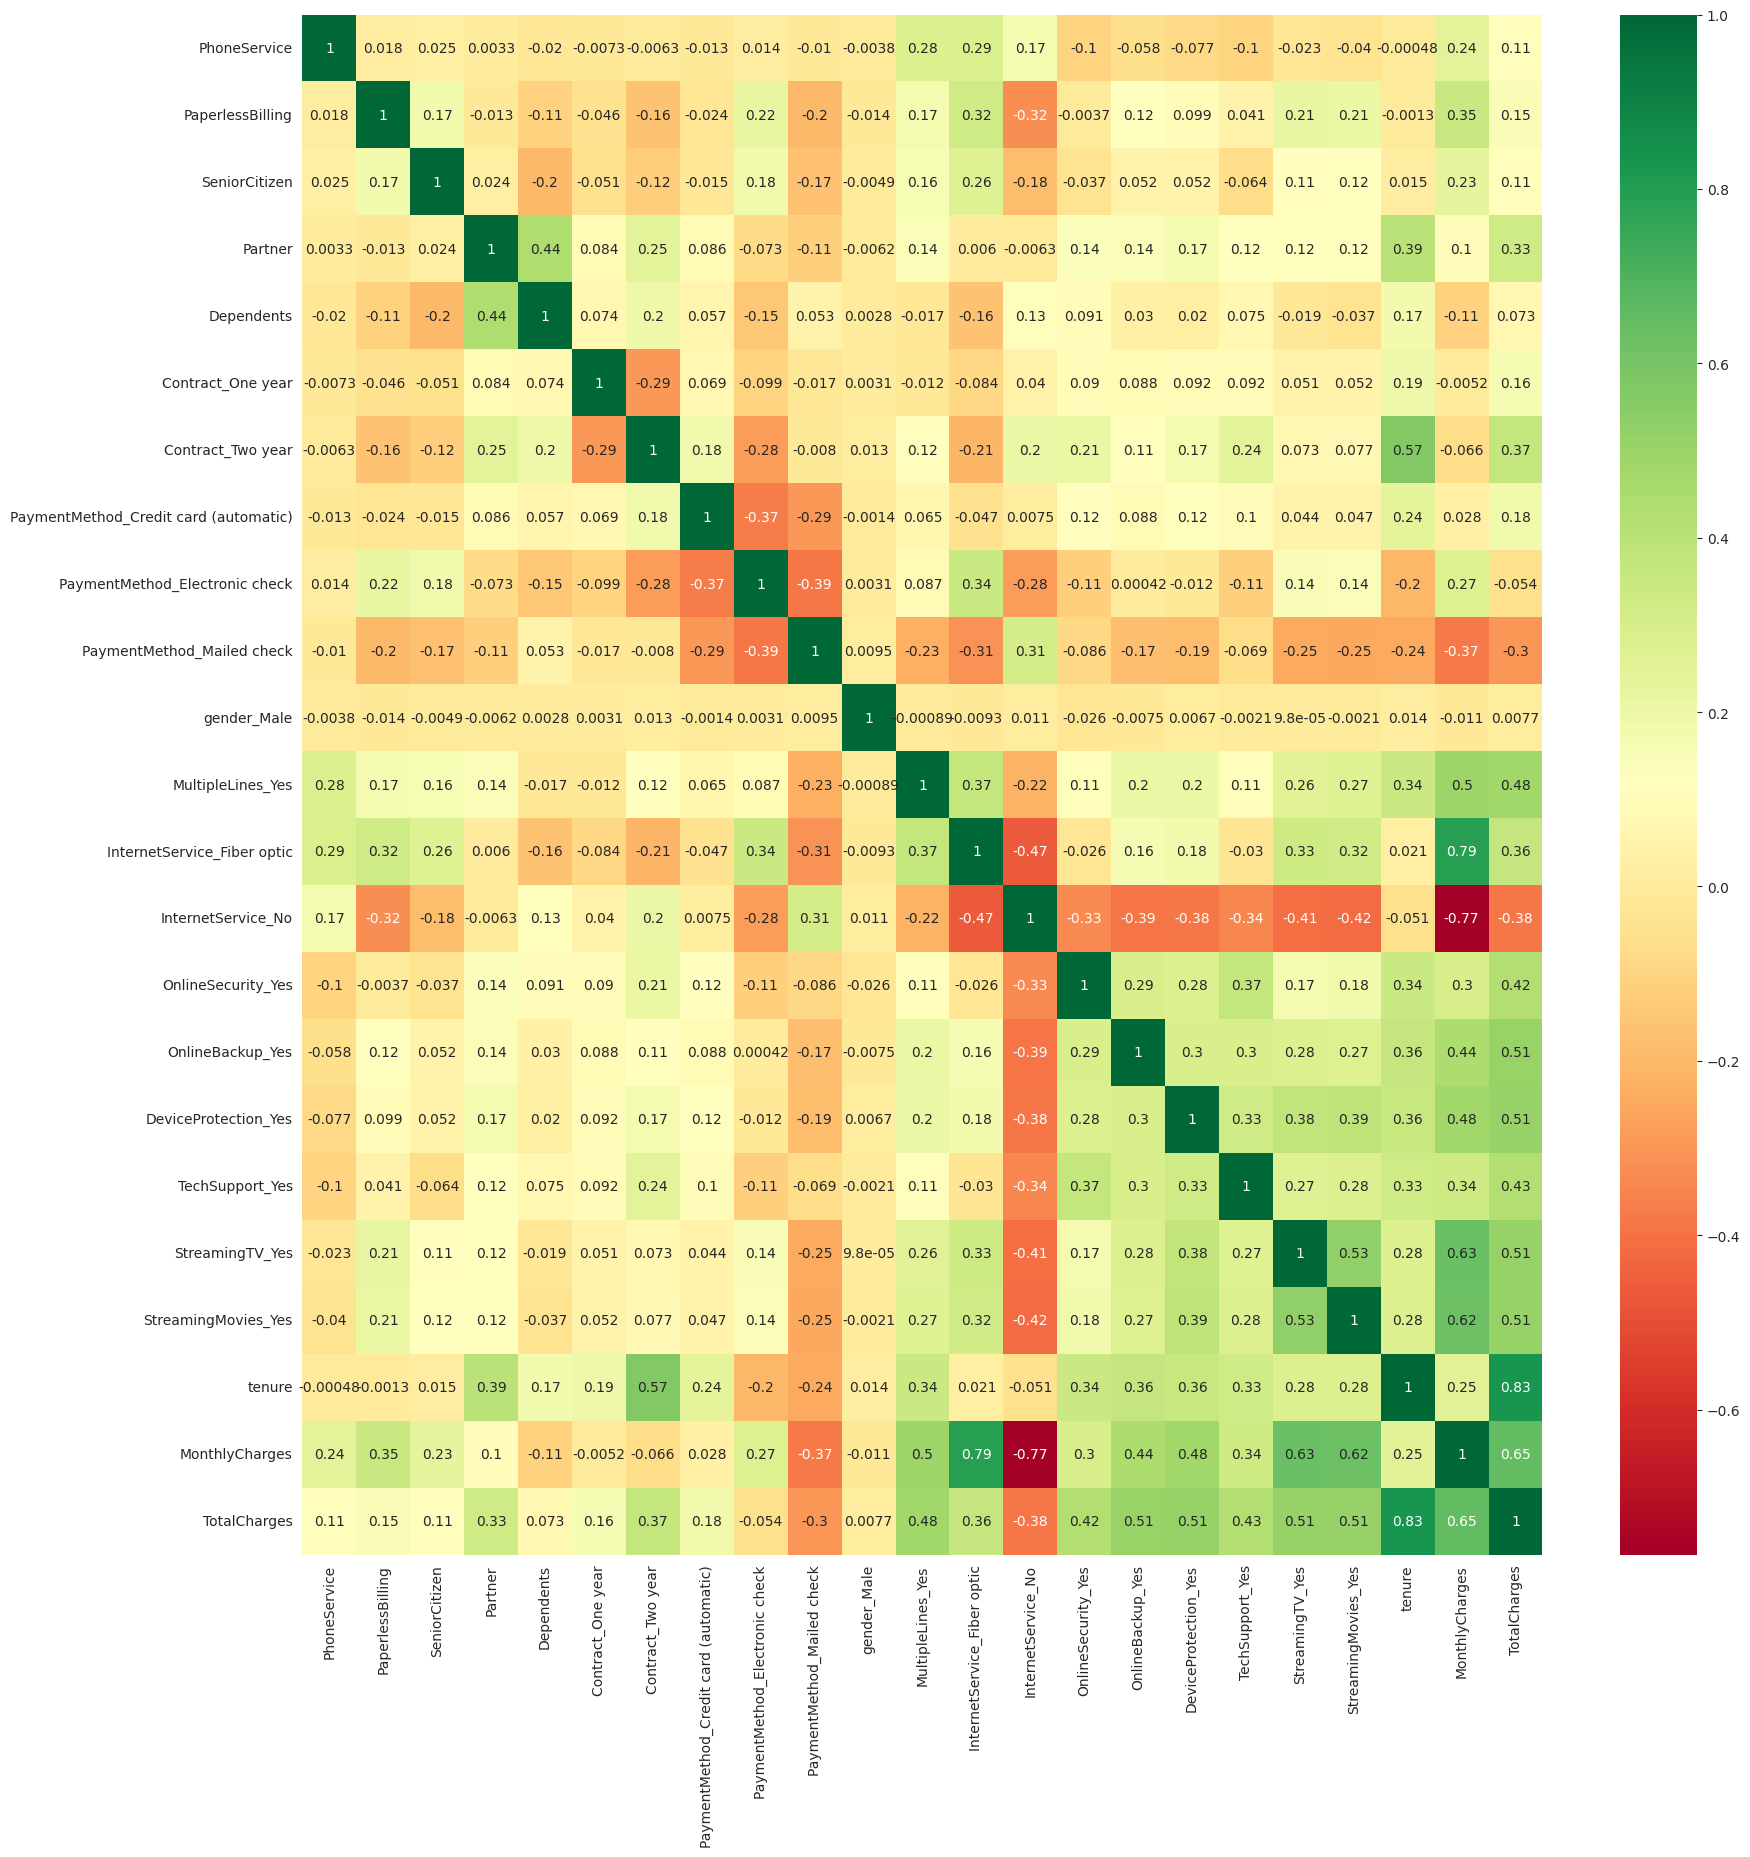

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train2.corr(),annot=True,cmap="RdYlGn")
plt

In [45]:
X_train2.columns

Index(['PhoneService', 'PaperlessBilling', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [46]:
logm2 = sm.GLM(y_train, sm.add_constant(X_train2), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Wed, 26 Mar 2025   Deviance:                       4009.4
Time:                        05:20:57   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -1.5198      0.190     -8.015      0.000      -1.891      -1.148
MonthlyCharges                           -2.1817      1.160     -1.880      0.060      -4.456       0.092
TotalCharges                              0.7329      0.198      3.705      0.000       0.345       1.121
=========================================================================================================
"""

In [47]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False  True  True False  True False False  True
  True  True  True  True False False False False False  True False False
  True False  True  True  True  True]
[ 2  1  7 16 10  1  1 12  1 13 14  1  1  1  1  1  3  9 11  8 15  1  4  6
  1  5  1  1  1  1]


In [48]:
col = X.columns[rfe.support_]
col

Index(['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'TechSupport_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [49]:
#Principal Component Analysis
X_train.shape

(4922, 30)

In [50]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [52]:
pca.fit(X_train)

PCA(random_state=42)

In [56]:
pca.explained_variance_ratio_

array([3.93448269e-01, 1.85422909e-01, 6.14668310e-02, 3.41085248e-02,
       3.31236269e-02, 3.05746009e-02, 2.81241104e-02, 2.64295930e-02,
       2.51788353e-02, 2.32186683e-02, 1.91954322e-02, 1.89572858e-02,
       1.75177714e-02, 1.71031769e-02, 1.57076694e-02, 1.52450546e-02,
       1.35150732e-02, 1.21257926e-02, 1.03325111e-02, 7.60702892e-03,
       6.36889583e-03, 5.16953073e-03, 5.88090902e-05, 6.29386344e-18,
       4.37691555e-18, 2.83484449e-18, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

<BarContainer object of 30 artists>

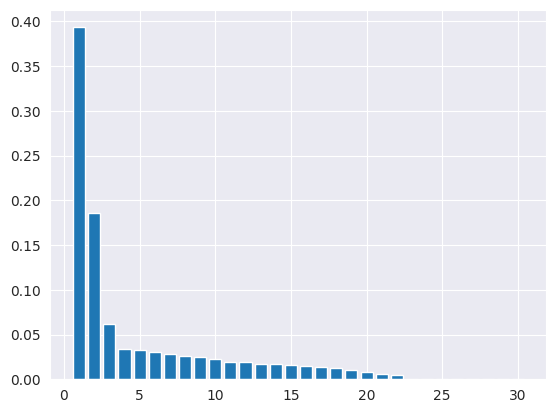

In [57]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

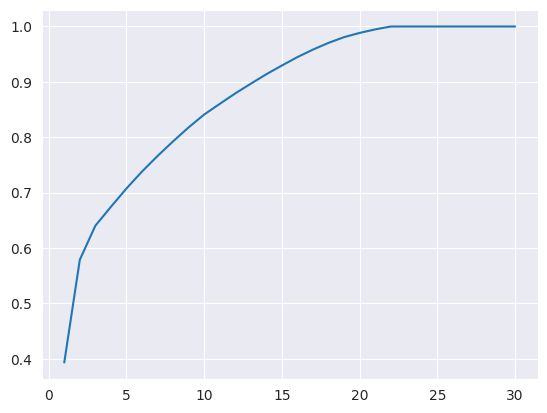

In [59]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.show()

In [243]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.39344827, 0.57887118, 0.64033801, 0.67444653, 0.70757016,
       0.73814476, 0.76626887, 0.79269846, 0.8178773 , 0.84109597,
       0.8602914 , 0.87924869, 0.89676646, 0.91386963, 0.9295773 ,
       0.94482236, 0.95833743, 0.97046322, 0.98079574, 0.98840276,
       0.99477166, 0.99994119, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

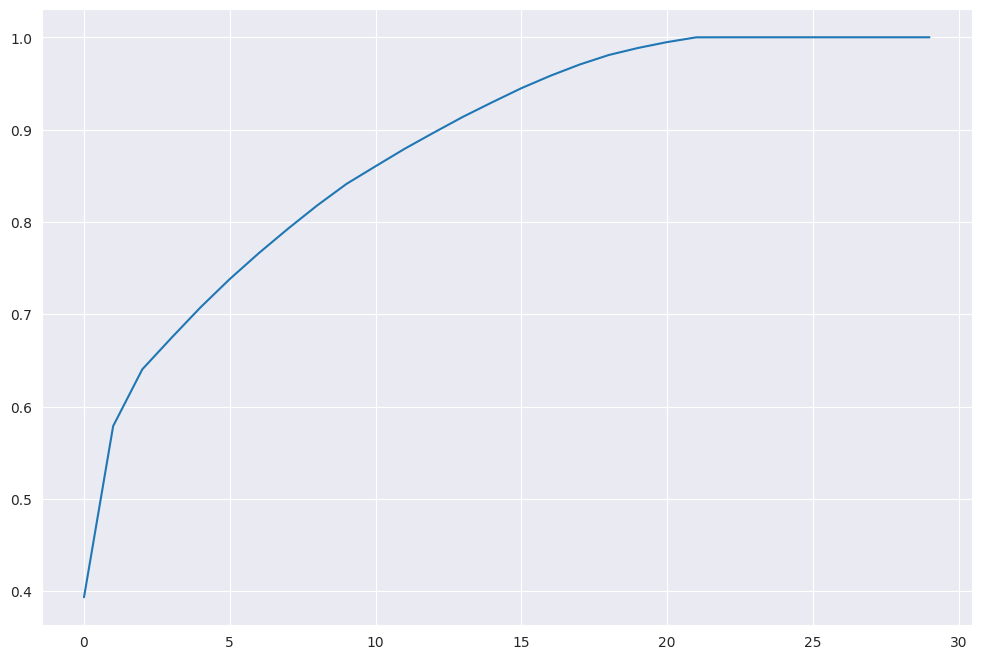

In [244]:
plt.figure(figsize=(12,8))
plt.plot(var_cumu)
plt.show()

In [ ]:
# aroud 95 percent variance is explained by 16 features

In [60]:
from sklearn.decomposition import IncrementalPCA

In [61]:
pca_final = IncrementalPCA(n_components=16)

In [62]:
df_train = pca_final.fit_transform(X_train)

In [63]:
df_train.shape

(4922, 16)

In [64]:
corrmat = np.corrcoef(df_train.transpose())
corrmat.shape

(16, 16)

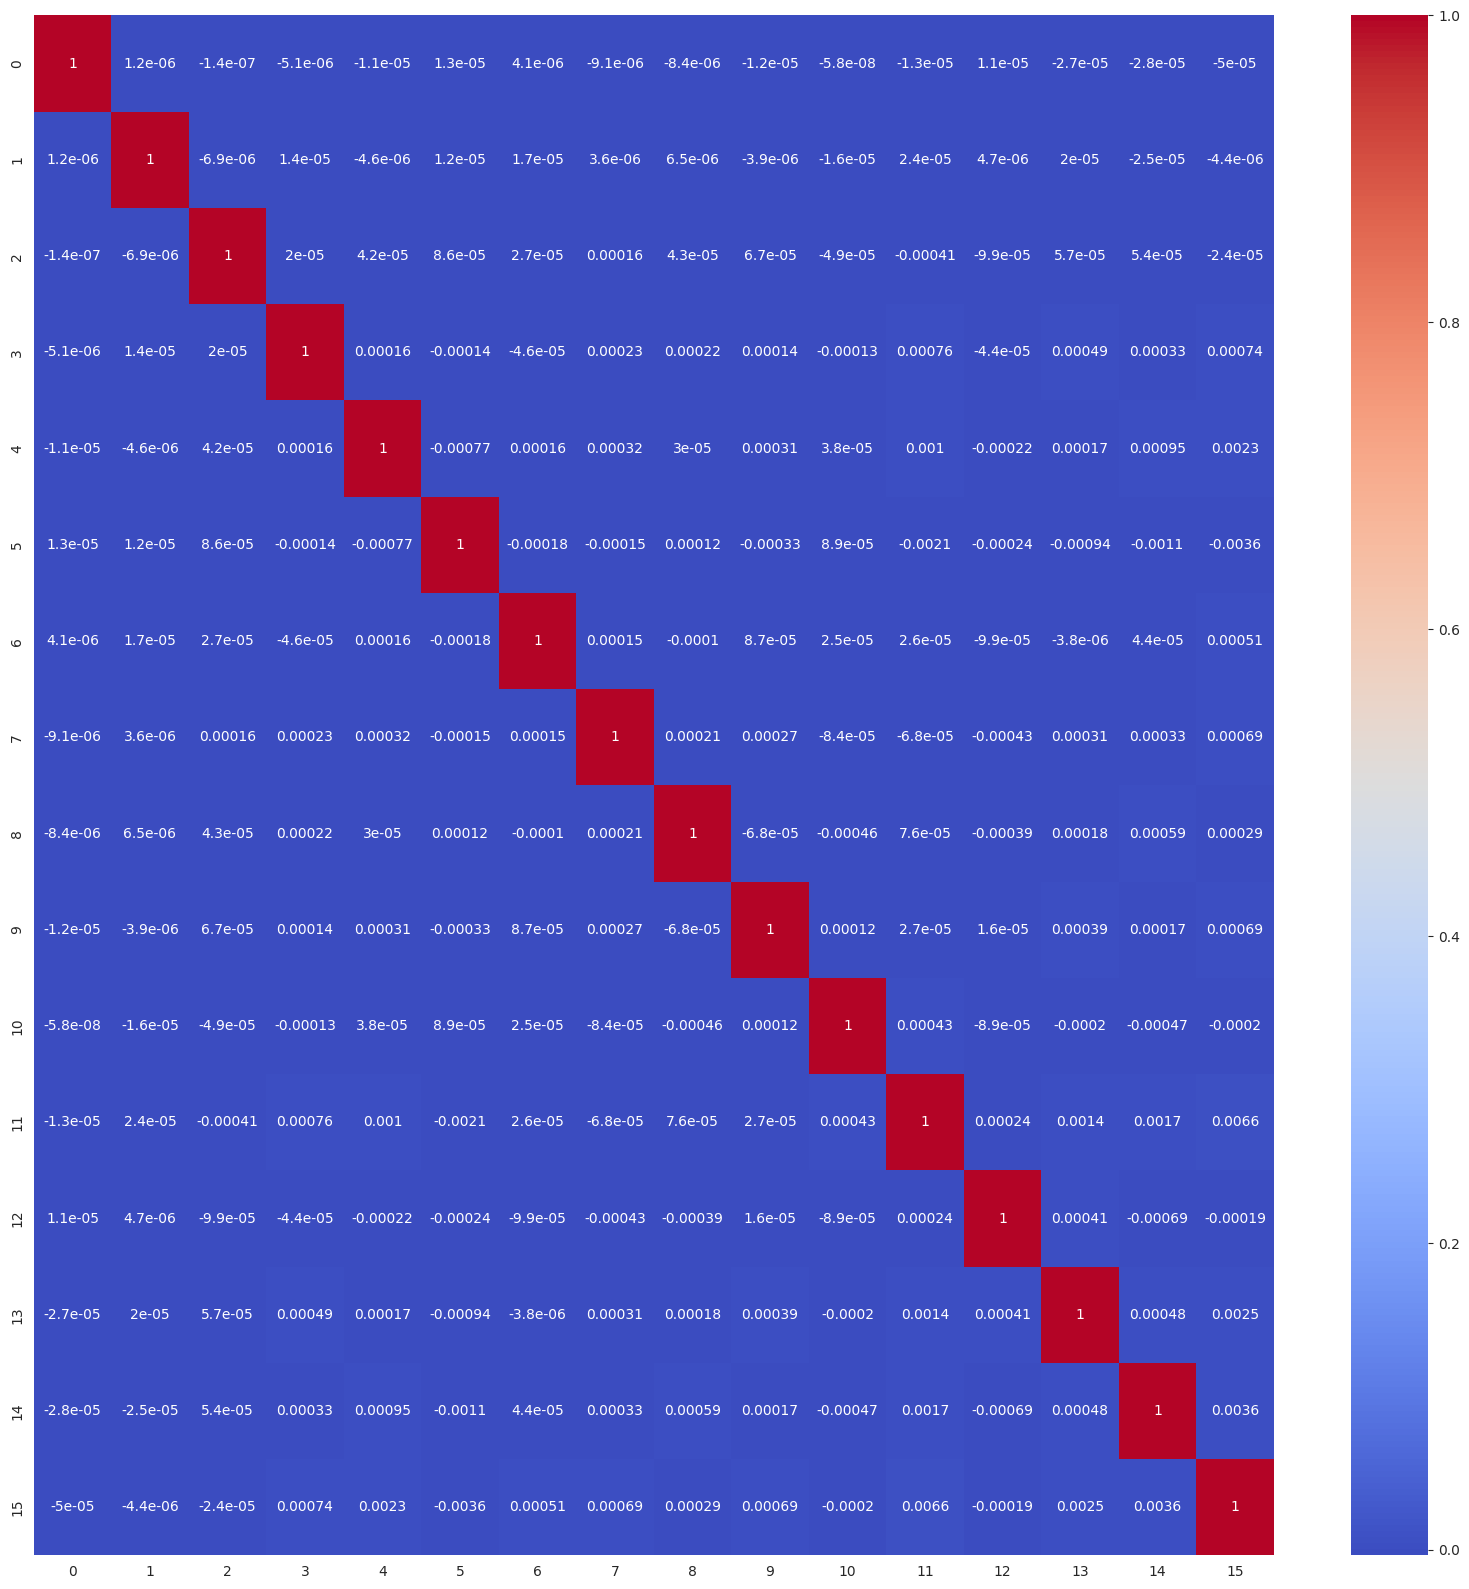

In [256]:
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True,cmap="coolwarm")
plt.show()

In [65]:
df_test_pca = pca_final.transform(X_test)

In [66]:
df_test_pca.shape

(2110, 16)

In [ ]:
# applying Logistic Regression to Principal Components

In [67]:
from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression()

In [68]:
model_pca = learner_pca.fit(df_train, y_train)

In [70]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

In [72]:
roc_auc_score(y_test, pred_probs_test[:,1])

np.float64(0.82565366312229)

In [73]:
#Making it a little more unsupervised

In [74]:
pca_again = PCA(0.9)

In [75]:
df_train_pc2 = pca_again.fit_transform(X_train)

In [76]:
df_train_pc2.shape

(4922, 14)

In [77]:
learneres_pca2 = LogisticRegression()

In [78]:
model_pca2 = learneres_pca2.fit(df_train_pc2, y_train)

In [79]:
df_test_pc2 = pca_again.transform(X_test)

In [80]:
df_test_pc2.shape

(2110, 14)

In [83]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pc2)[:,1]

In [88]:
from sklearn import metrics

In [90]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.83'